In [7]:
# This code computes the various graphs shown across the report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

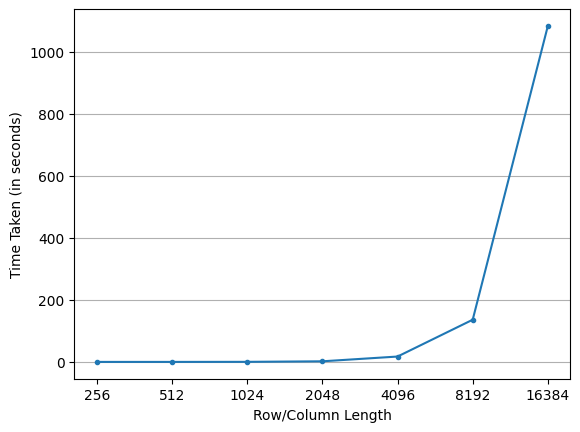

In [8]:
# [Sequential Graph]

df = pd.read_csv("./sequential/sequential.csv")

plt.plot(np.log2(df["Length"]), df["Time"]/1000, marker=".")
#plt.xticks([0, 256, 512, 1024, 2048, 4096, 8192, 16384], rotation=90)
# plt.yticks(np.arange(0, df["Time"].max()))
plt.xticks(
    ticks=np.arange(np.log2(df["Length"]).min(), np.log2(df["Length"]).max()+1),
    labels=[256, 512, 1024, 2048, 4096, 8192, 16384]
    )
plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')

plt.savefig("sequential_graph.png", dpi=300, bbox_inches="tight")
plt.show()

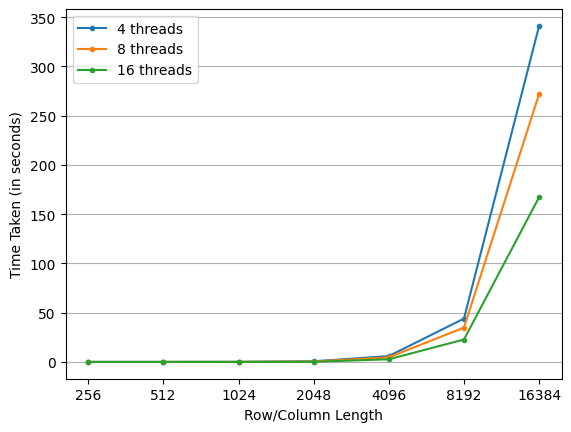

In [9]:
#[FastFlow] Difference in threads for Static Chunk approach

df_1 = pd.read_csv("./fastflow_static/static_4_threads.csv")
df_2 = pd.read_csv("./fastflow_static/static_8_threads.csv")
df_3 = pd.read_csv("./fastflow_static/static_16_threads.csv")

# Static Chunk Fast Flow threads
plt.plot(np.log2(df_1["Length"]), df_1["Time"]/1000, marker=".", label="4 threads")
plt.plot(np.log2(df_2["Length"]), df_2["Time"]/1000, marker=".", label="8 threads")
plt.plot(np.log2(df_3["Length"]), df_3["Time"]/1000, marker=".", label = "16 threads")

plt.xticks(
    ticks=np.arange(np.log2(df_1["Length"]).min(), np.log2(df_1["Length"]).max()+1),
    labels=[256, 512, 1024, 2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("ff_static_graph.png", dpi=300, bbox_inches="tight")
plt.show()

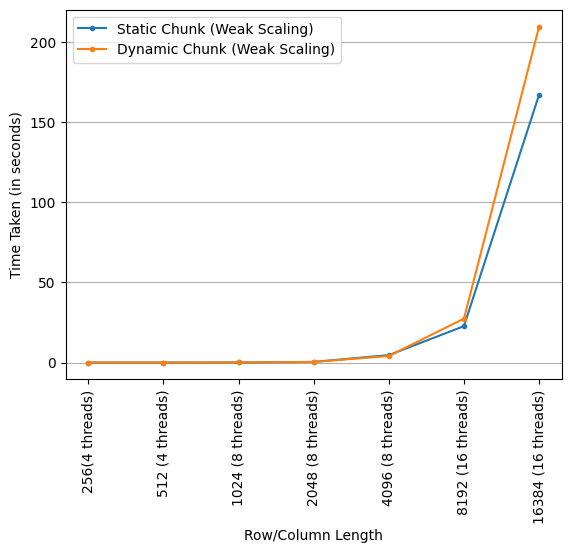

In [10]:
#[FastFlow] Static Chunk Size vs Dynamic Chunk Size
df_4 = pd.read_csv("./fastflow_static/ff_static_weak.csv")
df_5 = pd.read_csv("./fastflow_dynamic/ff_dynamic_weak.csv")

plt.plot(np.log2(df_4["Length"]), df_4["Time"]/1000, marker=".", label="Static Chunk (Weak Scaling)")
plt.plot(np.log2(df_5["Length"]), df_5["Time"]/1000, marker=".", label="Dynamic Chunk (Weak Scaling)")

plt.xticks(
    ticks=np.arange(np.log2(df_1["Length"]).min(), np.log2(df_1["Length"]).max()+1),
    labels=["256(4 threads)",
            "512 (4 threads)", 
            "1024 (8 threads)", 
            "2048 (8 threads)", 
            "4096 (8 threads)", 
            "8192 (16 threads)", 
            "16384 (16 threads)"], rotation=90
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("ff_static_vs_dynamic.png", dpi=300, bbox_inches="tight")
plt.show()

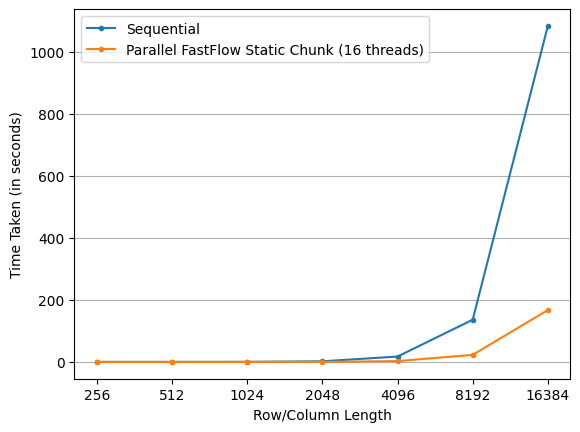

In [11]:
#[FastFlow]Comparison between Sequential vs FastFlow Static Chunk Size using 16_threads
plt.plot(np.log2(df["Length"]), df["Time"]/1000, marker=".", label="Sequential")
plt.plot(np.log2(df_3["Length"]), df_3["Time"]/1000, marker=".", label="Parallel FastFlow Static Chunk (16 threads)")

plt.xticks(
    ticks=np.arange(np.log2(df_1["Length"]).min(), np.log2(df_1["Length"]).max()+1),
    labels=[256, 512, 1024, 2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("ff_sequential_vs_fastflow.png", dpi=300, bbox_inches="tight")
plt.show()

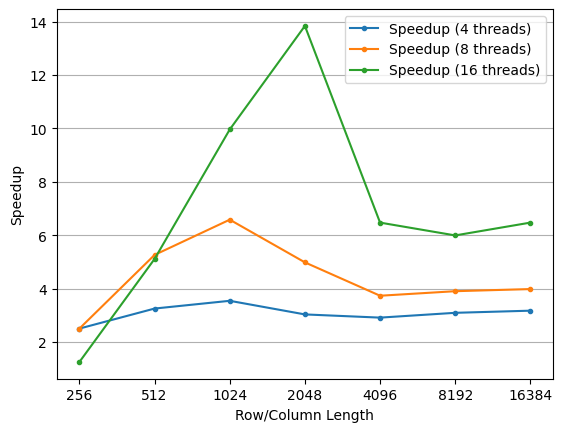

In [12]:
#[FastFlow] Speedup graph

df_6 = pd.read_csv("./fastflow_static/speedup_4_threads.csv")
df_7 = pd.read_csv("./fastflow_static/speedup_8_threads.csv")
df_8 = pd.read_csv("./fastflow_static/speedup_16_threads.csv")

plt.plot(np.log2(df_6["Length"]), df_6["Speedup"], marker=".", label="Speedup (4 threads)")
plt.plot(np.log2(df_7["Length"]), df_7["Speedup"], marker=".", label="Speedup (8 threads)")
plt.plot(np.log2(df_8["Length"]), df_8["Speedup"], marker=".", label="Speedup (16 threads)")

plt.xticks(
    ticks=np.arange(np.log2(df_1["Length"]).min(), np.log2(df_1["Length"]).max()+1),
    labels=[256, 512, 1024, 2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Speedup")
plt.grid(axis='y')


plt.legend()
plt.savefig("ff_speedup.png", dpi=300, bbox_inches="tight")
plt.show()

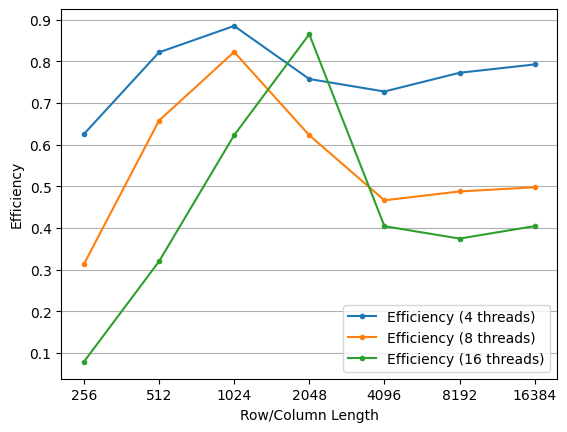

In [13]:
#[FastFlow] Efficiency graph
df_A = pd.read_csv("./fastflow_static/efficiency_4_threads.csv")
df_B = pd.read_csv("./fastflow_static/efficiency_8_threads.csv")
df_C = pd.read_csv("./fastflow_static/efficiency_16_threads.csv")

plt.plot(np.log2(df_A["Length"]), df_A["Efficiency"], marker=".", label="Efficiency (4 threads)")
plt.plot(np.log2(df_B["Length"]), df_B["Efficiency"], marker=".", label="Efficiency (8 threads)")
plt.plot(np.log2(df_C["Length"]), df_C["Efficiency"], marker=".", label="Efficiency (16 threads)")

plt.xticks(
    ticks=np.arange(np.log2(df_A["Length"]).min(), np.log2(df_A["Length"]).max()+1),
    labels=[256, 512, 1024, 2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Efficiency")
plt.grid(axis='y')


plt.legend()
plt.savefig("ff_efficiency.png", dpi=300, bbox_inches="tight")
plt.show()

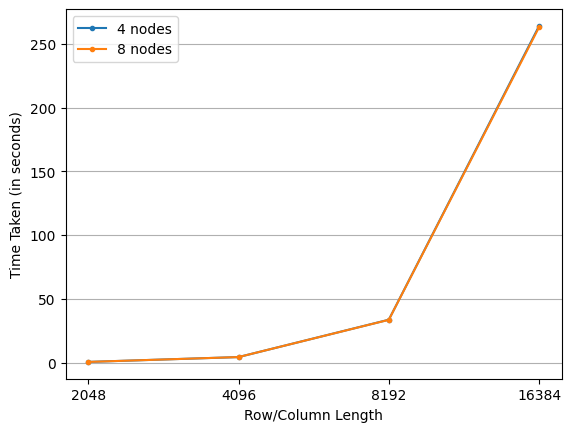

In [14]:
#[MPI] Strong Scaling
df_12 = pd.read_csv("./mpi/4_nodes/4_nodes_1_threads.csv")
df_13 = pd.read_csv("./mpi/8_nodes/8_nodes_1_threads.csv")

plt.plot(np.log2(df_12["Length"]), df_12["Time"]/1000, marker=".", label="4 nodes")
plt.plot(np.log2(df_13["Length"]), df_13["Time"]/1000, marker=".", label="8 nodes")

plt.xticks(
    ticks=np.arange(np.log2(df_12["Length"]).min(), np.log2(df_13["Length"]).max()+1),
    labels=[2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("mpi_strong_scaling.png", dpi=300, bbox_inches="tight")
plt.show()

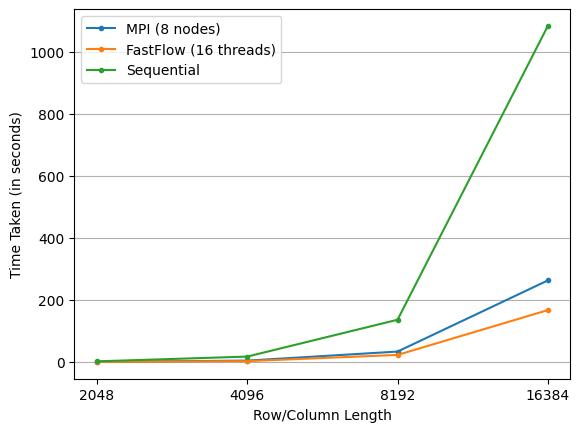

In [15]:
#[GENERAL] Comparisons between all approaches
df_14 = pd.read_csv("./mpi/8_nodes/8_nodes_1_threads.csv")
df_15 = pd.read_csv("./fastflow_static/static_16_threads.csv")
df_16 = pd.read_csv("./sequential/sequential.csv")

plt.plot(np.log2(df_14["Length"]), df_14["Time"]/1000, marker=".", label="MPI (8 nodes)")
plt.plot(np.log2(df_15["Length"][3:]), df_15["Time"][3:]/1000, marker=".", label="FastFlow (16 threads)")
plt.plot(np.log2(df_16["Length"][3:]), df_16["Time"][3:]/1000, marker=".", label="Sequential")


plt.xticks(
    ticks=np.arange(np.log2(df_12["Length"]).min(), np.log2(df_13["Length"]).max()+1),
    labels=[2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("general_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

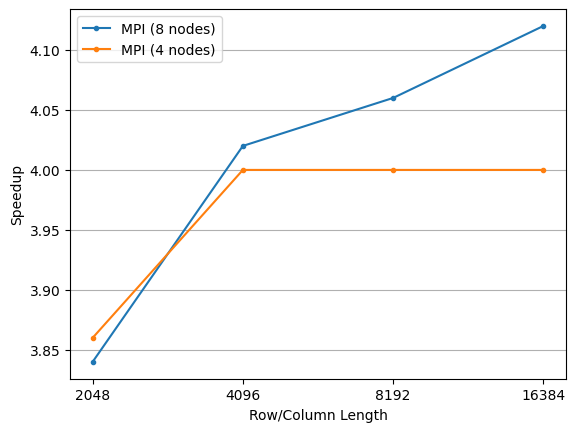

In [16]:
#[MPI] Speedup graph
df_17 = pd.read_csv("./mpi/8_nodes/speedup_8_nodes.csv")
df_18 = pd.read_csv("./mpi/4_nodes/speedup_4_nodes.csv")

plt.plot(np.log2(df_17["Length"]), df_17["Speedup"], marker=".", label="MPI (8 nodes)")
plt.plot(np.log2(df_18["Length"]), df_18["Speedup"], marker=".", label="MPI (4 nodes)")


plt.xticks(
    ticks=np.arange(np.log2(df_17["Length"]).min(), np.log2(df_18["Length"]).max()+1),
    labels=[2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Speedup")
plt.grid(axis='y')


plt.legend()
plt.savefig("mpi_speedup.png", dpi=300, bbox_inches="tight")
plt.show()

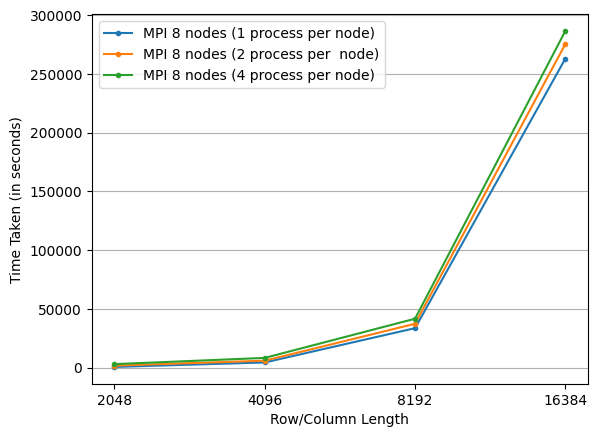

In [17]:
# [MPI] Comparison using more process per node
df_19 = pd.read_csv("./mpi/8_nodes/8_nodes_1_threads.csv")
df_20 = pd.read_csv("./mpi/8_nodes/8_nodes_2_threads.csv")
df_21 = pd.read_csv("./mpi/8_nodes/8_nodes_4_threads.csv")

plt.plot(np.log2(df_19["Length"]), df_19["Time"], marker=".", label="MPI 8 nodes (1 process per node)")
plt.plot(np.log2(df_20["Length"]), df_20["Time"], marker=".", label="MPI 8 nodes (2 process per  node)")
plt.plot(np.log2(df_21["Length"]), df_21["Time"], marker=".", label="MPI 8 nodes (4 process per node)")

plt.xticks(
    ticks=np.arange(np.log2(df_19["Length"]).min(), np.log2(df_19["Length"]).max()+1),
    labels=[2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Time Taken (in seconds)")
plt.grid(axis='y')


plt.legend()
plt.savefig("mpi_threads.png", dpi=300, bbox_inches="tight")
plt.show()

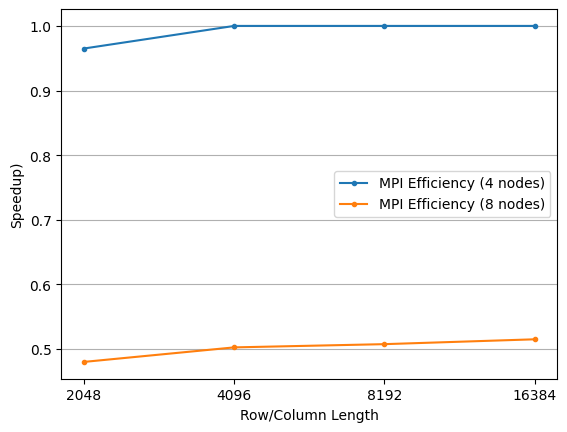

In [18]:
#[MPI] Efficiency graph
df_22 = pd.read_csv("./mpi/4_nodes/efficiency_4_nodes.csv")
df_23 = pd.read_csv("./mpi/8_nodes/efficiency_8_nodes.csv")

plt.plot(np.log2(df_22["Length"]), df_22["Efficiency"], marker=".", label="MPI Efficiency (4 nodes)")
plt.plot(np.log2(df_23["Length"]), df_23["Efficiency"], marker=".", label="MPI Efficiency (8 nodes)")

plt.xticks(
    ticks=np.arange(np.log2(df_19["Length"]).min(), np.log2(df_19["Length"]).max()+1),
    labels=[2048, 4096, 8192, 16384]
    )

plt.xlabel("Row/Column Length")
plt.ylabel("Speedup)")
plt.grid(axis='y')


plt.legend()
plt.savefig("mpi_efficiency.png", dpi=300, bbox_inches="tight")
plt.show()